In [1]:
import networkx as nx

n = 20
G = nx.complete_graph(n)

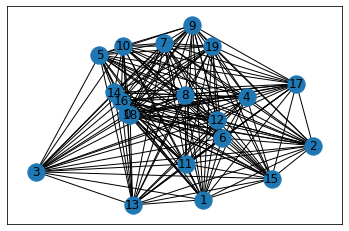

In [2]:
import random

my_pos = { i:(random.random(),random.random()) for i in G.nodes}
nx.draw_networkx(G,my_pos,with_labels=True)

In [3]:
import math
def eucl_dist(x1,y1,x2,y2):
    return math.sqrt( (x1-x2)**2 + (y1-y2)**2 )

for i,j in G.edges:
    (x1,y1) = my_pos[i]
    (x2,y2) = my_pos[j]
    G.edges[i,j]['length'] = eucl_dist(x1,y1,x2,y2)

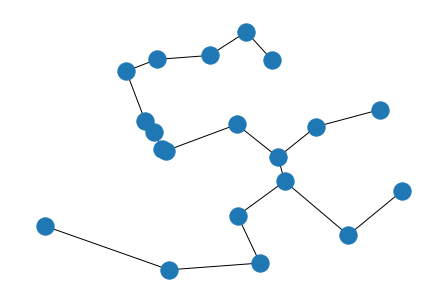

In [6]:
T = nx.minimum_spanning_tree(G, weight='length')
nx.draw(T, pos=my_pos)

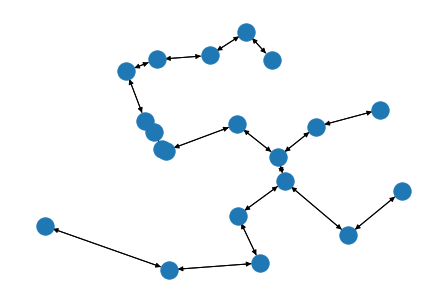

In [7]:
D = nx.DiGraph(T)
nx.draw(D, pos=my_pos)

In [11]:
# find eulerian cycle of doubled spanning tree

initial_tour = list(nx.eulerian_circuit(D, source=0))
print(initial_tour)

[(0, 18), (18, 8), (8, 12), (12, 6), (6, 15), (15, 2), (2, 15), (15, 6), (6, 11), (11, 1), (1, 13), (13, 3), (3, 13), (13, 1), (1, 11), (11, 6), (6, 12), (12, 4), (4, 17), (17, 4), (4, 12), (12, 8), (8, 18), (18, 0), (0, 16), (16, 14), (14, 5), (5, 10), (10, 7), (7, 9), (9, 19), (19, 9), (9, 7), (7, 10), (10, 5), (5, 14), (14, 16), (16, 0)]


In [10]:
tour = [0]

for (i,j) in initial_tour:
    if j not in tour:
        tour.append(j)
print(tour)

[0, 18, 8, 12, 6, 15, 2, 11, 1, 13, 3, 4, 17, 16, 14, 5, 10, 7, 9, 19]


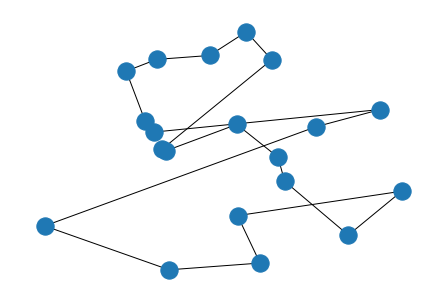

In [12]:
tour_edges = [(tour[i-1], tour[i]) for i in range(n)]
nx.draw(G.edge_subgraph(tour_edges), pos=my_pos)